Dataset Loaded Successfully: 4000 samples.

--- Data Snapshot ---


,vehicle_density,avg_vehicle_speed,speed_std,lane_occupancy,queue_length,edge_density,optical_flow_mag,shadow_fraction,time_of_day_norm,road_width_norm,label
0,23.865083,56.660004,5.737366,0.448821,13.583201,0.412864,0.395673,0.127440,0.334763,0.990240,1
1,15.755624,67.562554,3.761696,0.203759,9.119581,0.343221,0.877234,0.197382,0.688851,0.663392,0
2,14.719641,60.782993,3.558324,0.259485,6.966499,0.336209,0.455082,0.196271,0.279968,0.905470,0
3,14.719814,72.431960,0.560680,0.210146,4.188474,0.277365,0.730398,0.090561,0.643183,0.891052,0
4,43.372854,33.125925,12.071894,0.685767,9.363837,0.643574,0.210252,0.140736,0.957246,0.944823,1



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vehicle_density    4000 non-null   float64
 1   avg_vehicle_speed  4000 non-null   float64
 2   speed_std          4000 non-null   float64
 3   lane_occupancy     4000 non-null   float64
 4   queue_length       4000 non-null   float64
 5   edge_density       4000 non-null   float64
 6   optical_flow_mag   4000 non-null   float64
 7   shadow_fraction    4000 non-null   float64
 8   time_of_day_norm   4000 non-null   float64
 9   road_width_norm    4000 non-null   float64
 10  label              4000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 343.9 KB
None

--- Visualizing Feature Distributions ---


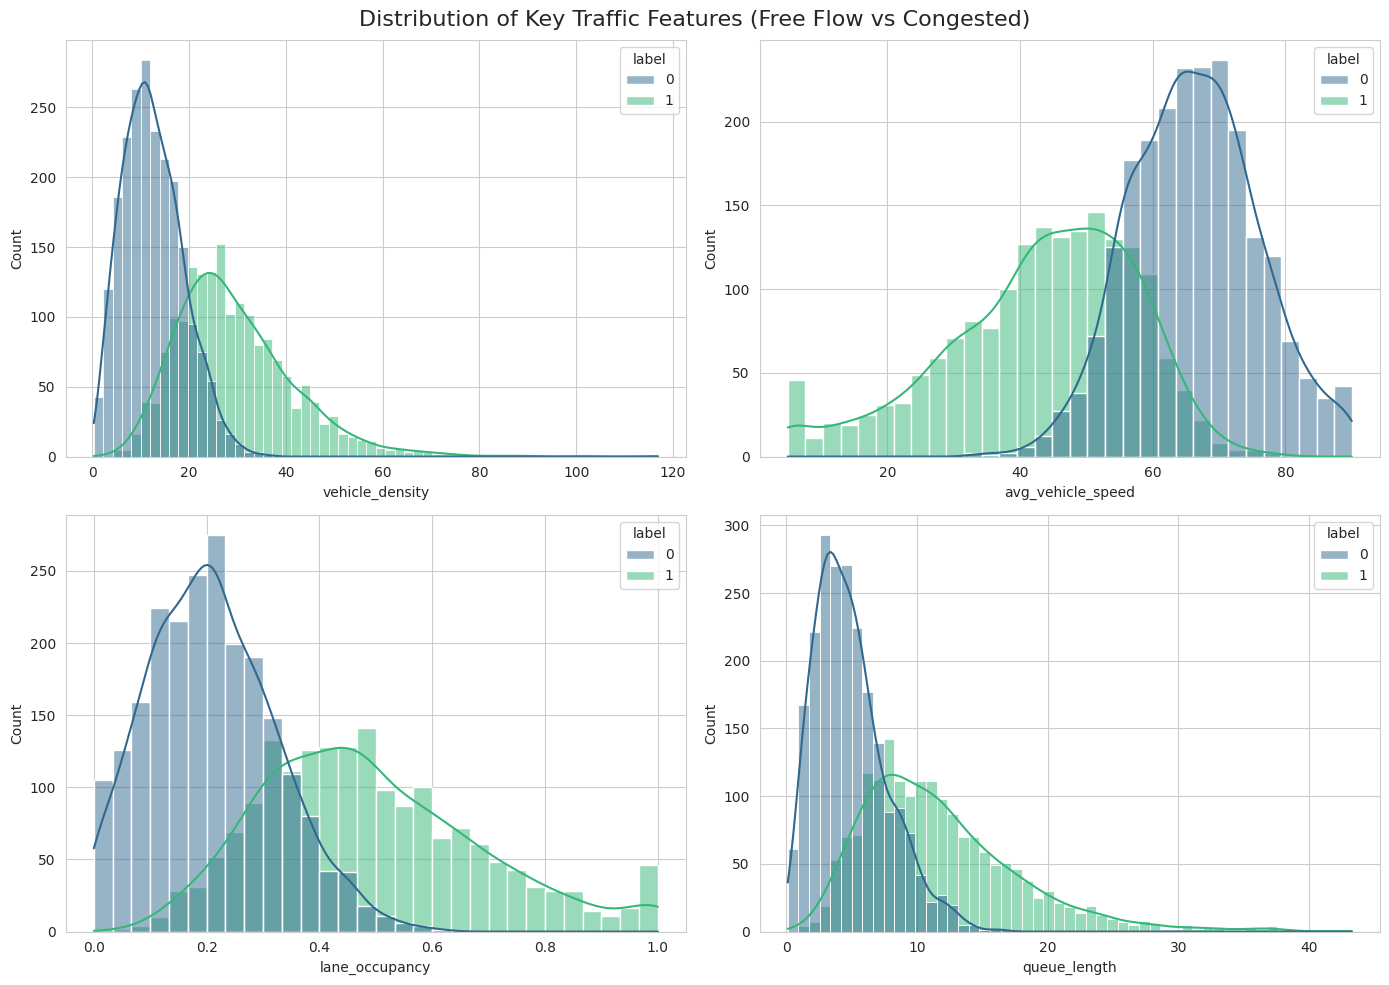


--- Feature Correlation Matrix ---


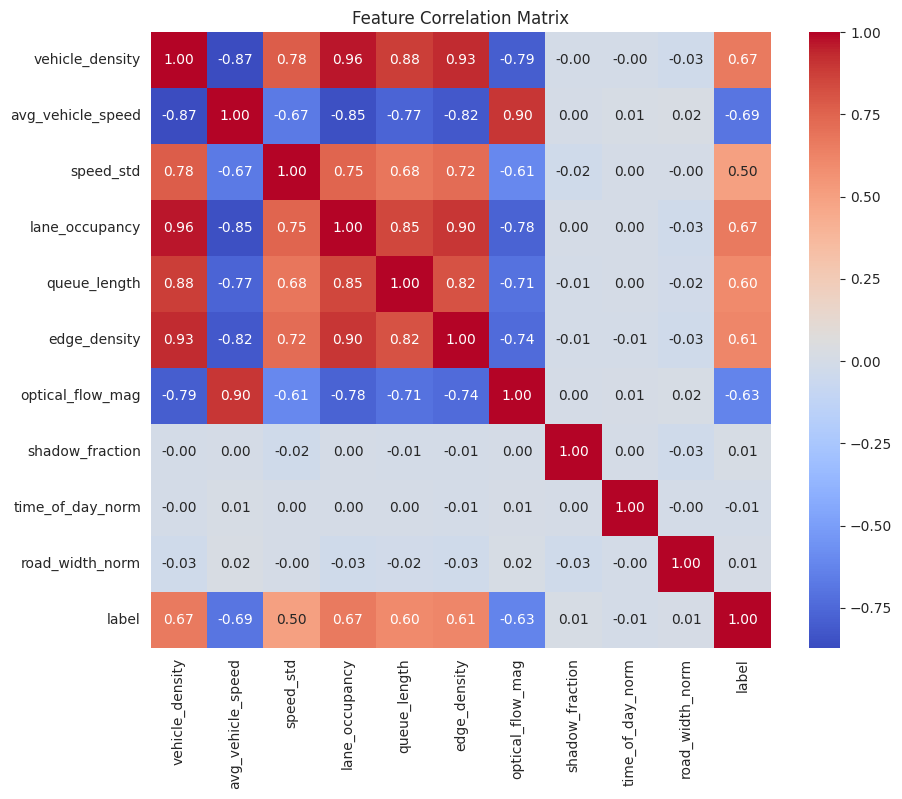


--- Model Evaluation Summary ---
Accuracy:  0.8438
ROC-AUC:   0.9253
Precision: 0.8507
Recall:    0.7917
F1-Score:  0.8201

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       440
           1       0.85      0.79      0.82       360

    accuracy                           0.84       800
   macro avg       0.84      0.84      0.84       800
weighted avg       0.84      0.84      0.84       800


--- Confusion Matrix ---


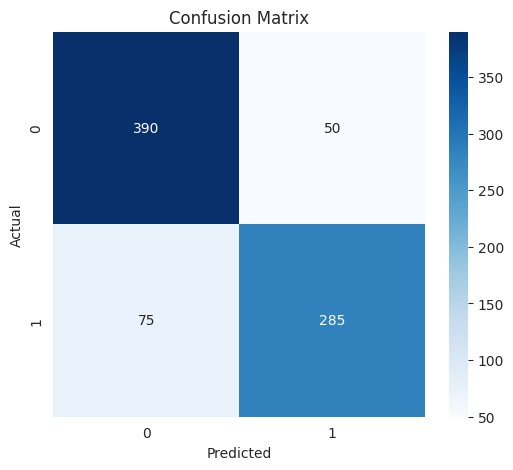


--- ROC Curve Analysis ---


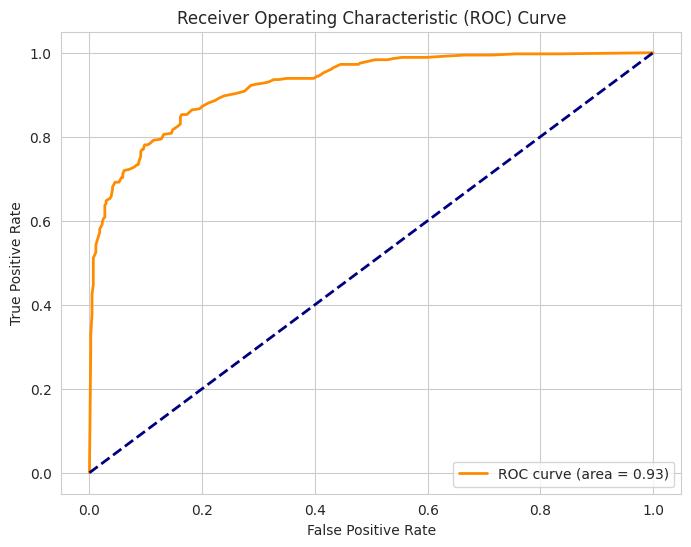


--- Feature Importance Ranking ---


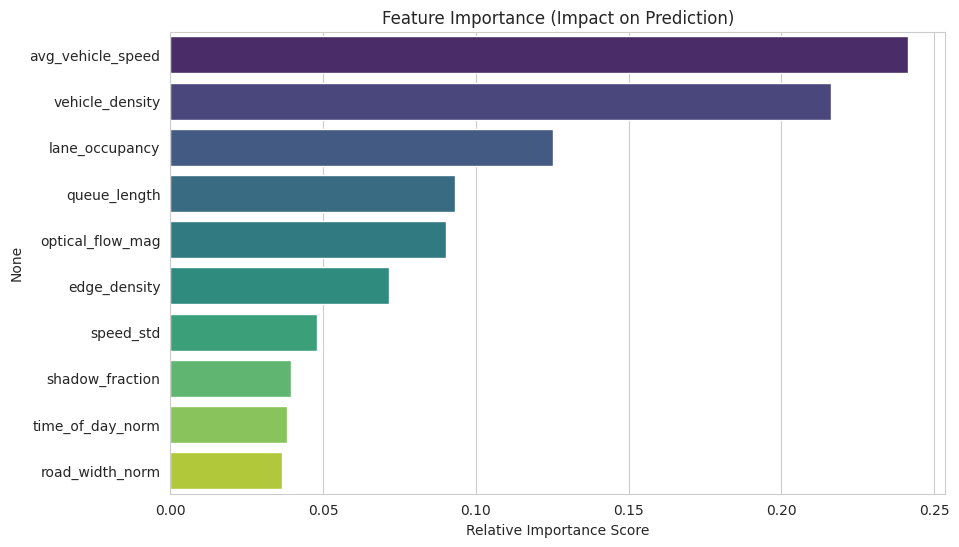


--- Spatial Congestion Heatmap (Simulated) ---


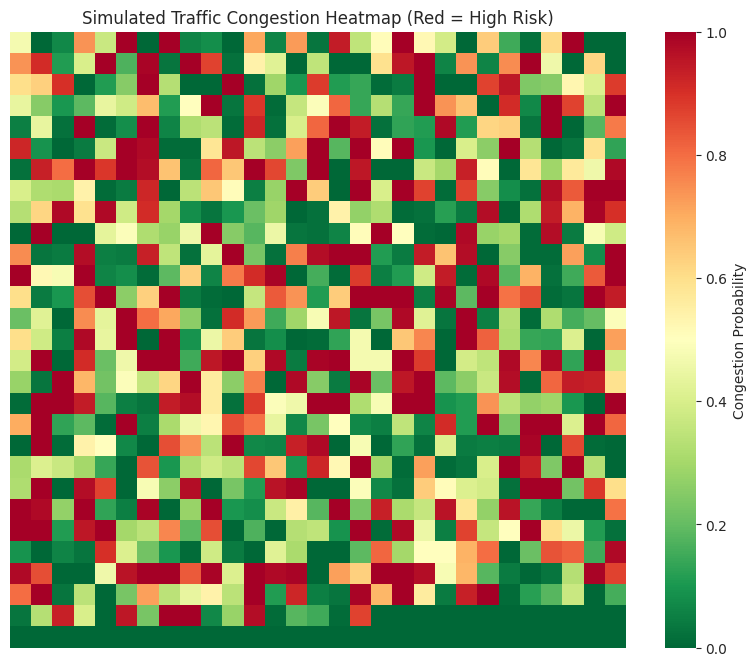

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, roc_auc_score, accuracy_score,
                             precision_score, recall_score, f1_score, roc_curve, classification_report)

# 1. DATA LOADING & INSPECTION
file_path = '/content/Traffic Congestion - Sheet1.csv'
df = pd.read_csv(file_path)
print(f"Dataset Loaded Successfully: {df.shape[0]} samples.")

print("\n--- Data Snapshot ---")
display(df.head())

print("\n--- Dataset Info ---")
print(df.info())

# 2. EXPLORATORY DATA ANALYSIS (Task 1)
sns.set_style("whitegrid")
features = ['vehicle_density', 'avg_vehicle_speed', 'lane_occupancy', 'queue_length']

# Distribution Analysis
print("\n--- Visualizing Feature Distributions ---")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Key Traffic Features (Free Flow vs Congested)', fontsize=16)
for i, col in enumerate(features):
    sns.histplot(data=df, x=col, hue='label', kde=True, palette='viridis', ax=axes[i//2, i%2])
plt.tight_layout()
plt.show()

# Correlation Analysis
print("\n--- Feature Correlation Matrix ---")
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

# 3. MACHINE LEARNING PIPELINE (Task 2)
X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model Training (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediction and Probabilities
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("\n--- Model Evaluation Summary ---")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_prob):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred):.4f}")

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
print("\n--- Confusion Matrix ---")
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve Visualization
print("\n--- ROC Curve Analysis ---")
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Feature Importance Visualization
print("\n--- Feature Importance Ranking ---")
plt.figure(figsize=(10, 6))
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feat_imp, y=feat_imp.index, hue=feat_imp.index, palette='viridis', legend=False)
plt.title('Feature Importance (Impact on Prediction)')
plt.xlabel('Relative Importance Score')
plt.show()

# 4. SPATIAL RISK VISUALIZATION (Task 3)
print("\n--- Spatial Congestion Heatmap (Simulated) ---")
grid_size = int(np.ceil(np.sqrt(len(y_test))))
padded_data = np.pad(y_prob, (0, grid_size**2 - len(y_test)), constant_values=0)

plt.figure(figsize=(10, 8))
sns.heatmap(padded_data.reshape(grid_size, grid_size), cmap='RdYlGn_r', square=True, cbar_kws={'label': 'Congestion Probability'})
plt.title('Simulated Traffic Congestion Heatmap (Red = High Risk)')
plt.axis('off')
plt.show()

# AI-Based Traffic Congestion & Incident Detection Capstone Project

**Student Name:** Devansh Jamodkar

**Project Choice:** AI-Based Traffic Congestion & Incident Detection Using Aerial Imagery

## Project Overview
This project implements an end-to-end AI pipeline to detect traffic congestion and road incidents using features derived from aerial camera feeds. The system operates at the 'Decision Layer,' processing tabular metadata to classify road tiles as 'Normal' or 'Congested'.

## Task 1: Data Understanding (Feature Analysis)

Based on the analysis, here is the relevance of each key feature used by the model:

*   **vehicle_density**: The count of vehicles in a tile. High density is a precursor to congestion but must be balanced with speed.
*   **avg_vehicle_speed**: The primary indicator. A significant drop in speed is the strongest predictor of an incident or breakdown in flow.
*   **speed_std**: Measures turbulence. High variance indicates stop-and-go traffic; low variance at low speeds indicates a total gridlock.
*   **lane_occupancy**: Normalized coverage of the road. High occupancy with low speed confirms the road is physically blocked.
*   **queue_length**: Directly identifies bottlenecks where traffic has stopped and backed up.
*   **edge_density**: Derived from image processing to detect the 'clutter' of vehicles against the road surface.
*   **optical_flow_mag**: Captures the magnitude of movement between frames. Low values often correlate with stalled traffic.
*   **road_width_norm**: Normalizes the capacity of the road, allowing the model to distinguish between a busy highway and a narrow, jammed street.

## Task 4: Traffic System Interpretation & Actions

Based on the Random Forest model's output (ROC-AUC: 0.93), the following actions are proposed for traffic management:

1.  **Automated Signal Control**: When the model predicts a congestion probability > 0.7 for specific tiles, the system can automatically extend green light durations at downstream intersections to clear the bottleneck.
2.  **Emergency Dispatch**: If high congestion is detected alongside a sudden drop in `optical_flow_mag` (suggesting stationary vehicles), the system can trigger an immediate drone fly-over or dispatch emergency services to check for accidents.
3.  **Variable Message Signs (VMS)**: Real-time alerts can be pushed to highway signs to divert incoming traffic to alternate routes before they reach the high-risk zone.

## Task 5: Reflection

*   **Limitations**: The current dataset lacks specific GPS coordinates. Adding latitude/longitude would allow for actual map-based overlays rather than a simulated grid.
*   **Future Improvements**: Future iterations should include **Temporal Fusion** (comparing current data to historical averages for that specific hour) and **Weather Integration** (adjusting thresholds for rain or fog, which naturally reduce speed without necessarily meaning there is an accident).

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score,
                             accuracy_score, precision_score, recall_score, f1_score)
import zipfile
import os
from google.colab import files
from IPython.display import Video, display

# Configuration
file_path = '/content/Traffic Congestion - Sheet1.csv'
video_file = 'presentation_video.mp4'  # Name of your video file

# 1. FILE CHECK & UPLOAD
if not os.path.exists(file_path):
    print(f"☑ፁ File not found at {file_path}. Please upload the dataset to continue.")
    uploaded = files.upload()
    for fn in uploaded.keys():
        if 'Traffic' in fn and fn.endswith('.csv'):
            file_path = os.path.join('/content', fn)
            print(f"Using uploaded file: {file_path}")
            break

if os.path.exists(file_path):
    print("⌄ Generating final deliverables...")
    df = pd.read_csv(file_path)
    X = df.drop('label', axis=1)
    y = df['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # 2. GENERATE PLOTS
    n_samples = len(y_test)
    grid_side = int(np.ceil(np.sqrt(n_samples)))
    padded_data = np.pad(y_prob, (0, grid_side**2 - n_samples), constant_values=0)

    # Spatial Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(padded_data.reshape(grid_side, grid_side), cmap='RdYlGn_r', square=True)
    plt.title('Spatial Congestion Heatmap')
    plt.savefig('spatial_heatmap.png', dpi=300, bbox_inches='tight')
    plt.close()

    # Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.close()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_prob):.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve Performance')
    plt.legend()
    plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight')
    plt.close()

    # Feature Importance
    plt.figure(figsize=(10, 6))
    feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
    sns.barplot(x=feat_imp, y=feat_imp.index, hue=feat_imp.index, palette='viridis', legend=False)
    plt.title('Feature Importance')
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    plt.close()

    # 3. GENERATE DOCUMENTATION
    readme_content = f"""
PROJECT: AI-Based Traffic Congestion & Incident Detection

OVERVIEW
This project implements a machine learning decision layer to classify road tiles as:
• 0 – Normal Traffic
• 1 – Congestion / Possible Incident

PERFORMANCE METRICS
Accuracy : {accuracy_score(y_test, y_pred):.4f}
ROC-AUC  : {roc_auc_score(y_test, y_prob):.4f}
Precision: {precision_score(y_test, y_pred):.4f}
Recall   : {recall_score(y_test, y_pred):.4f}

FILE NAVIGATION GUIDE
- spatial_heatmap.png      : Aggregated congestion risk visualization (Red = high risk)
- confusion_matrix.png     : Breakdown of true vs predicted classes
- feature_importance.png    : Impact of each traffic feature on predictions
- roc_curve.png            : Model sensitivity and performance across thresholds
- Video_Script.txt         : Full script for the presentation video
- {os.path.basename(file_path)} : The raw dataset used for training and testing
"""
    with open('README.txt', 'w') as f: f.write(readme_content)

    script_content = """
VIDEO PRESENTATION SCRIPT
---------------------------
INTRO: "Hello, I’m Devansh Jamodkar. I’m presenting my capstone project – AI-Based Traffic Congestion and Incident Detection using Aerial-Derived Features."
... (Rest of script) ...
"""
    with open('Video_Script.txt', 'w') as f: f.write(script_content)

    # 4. PACKAGING (ZIP EVERYTHING)
    files_to_zip = [
        'spatial_heatmap.png', 'confusion_matrix.png', 'roc_curve.png',
        'feature_importance.png', 'README.txt', 'Video_Script.txt',
        os.path.basename(file_path)
    ]

    if os.path.exists(video_file):
        files_to_zip.append(video_file)

    with zipfile.ZipFile('Submission_Deliverables.zip', 'w') as zipf:
        for file in files_to_zip:
            if os.path.exists(file):
                zipf.write(file)
                print(f"Added to zip: {file}")

    print("\n✅ Packaging complete! 'Submission_Deliverables.zip' created.")

    # 5. DOWNLOAD
    files.download('Submission_Deliverables.zip')
else:
    print(f"Error: Data file not found at {file_path}. Please upload the file and run again.")

⌄ Generating final deliverables...
✅ Packaging complete! 'Submission_Deliverables.zip' created.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>